# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Agent Training - DDPG Algorithm

In [7]:
# import modules
import torch
import collections
import matplotlib.pyplot as plt

In [8]:
# import agent
import model

In [9]:
def agent_train(agent=None, n_episodes=1000, max_t=1000):
    """DDPG
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []                                    # list containing scores from each episode
    moving_average = []                            # list containing average score
    scores_window = collections.deque(maxlen=100)  # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get current state
        agent.reset()
        score = 0
        
        for t in range(max_t):
            agent.reset()
            action = agent.act(state)                      # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished   
            agent.step(state, action, reward, next_state, done)
            state = next_state                             # roll over the state to next time step
            score += reward                                # update the score 
            if done:                                       # exit loop if episode finished
                break 
        
        scores_window.append(score)         # save most recent score
        scores.append(score)                # save most recent score
        mean_score = np.mean(scores_window) # mean score
        moving_average.append(mean_score)   # append mean score to list
        
        print(f"\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}", end="")

        if i_episode % 20 == 0:
            print(f"\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}")
        if i_episode % 40 == 0:
            torch.save(agent.actor_local.state_dict(), f"checkpoint-actor-{i_episode}.pth")
            torch.save(agent.critic_local.state_dict(), f"checkpoint-critic-{i_episode}.pth")
        if np.mean(scores_window)>=30:
            print(f"\nEnvironment solved in {i_episode:d} episodes")
            torch.save(agent.actor_local.state_dict(), f"checkpoint-actor-solved.pth")
            torch.save(agent.critic_local.state_dict(), f"checkpoint-critic-solved.pth")
            break
            
    return(scores, moving_average)

In [10]:
# create agent
ddpg = model.Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [11]:
# train the agent
scores, moving_average = agent_train(agent=ddpg, n_episodes=200)

Episode 20	Average Score: 0.81
Episode 40	Average Score: 1.39
Episode 60	Average Score: 2.32
Episode 80	Average Score: 3.64
Episode 100	Average Score: 6.56
Episode 120	Average Score: 13.14
Episode 140	Average Score: 20.50
Episode 160	Average Score: 27.25
Episode 169	Average Score: 30.15
Environment solved in 169 episodes


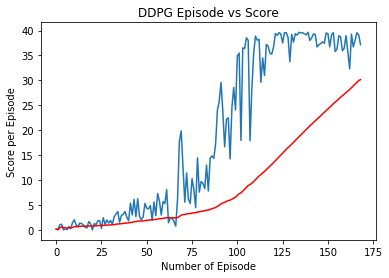

In [12]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), moving_average, c="r")
plt.ylabel("Score per Episode")
plt.xlabel("Number of Episode")
plt.title("DDPG Episode vs Score")
plt.savefig("ddpg-episode-vs-score.png", bbox_inches="tight")
plt.show()

In [13]:
# close the environment
env.close()

## Test Agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
# import modules
import torch
import collections
import matplotlib.pyplot as plt

In [3]:
# import agent
import model

In [4]:
env_test = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
# get the default brain
brain_name = env_test.brain_names[0]
brain = env_test.brains[brain_name]

In [6]:
env_info = env_test.reset(train_mode=True)[brain_name]

In [7]:
# number of actions and states
action_size = brain.vector_action_space_size
state_size  = len(env_info.vector_observations[0])

In [8]:
# create agent
agent_test = model.Agent(state_size=state_size, action_size=action_size, random_seed=99)

In [9]:
agent_test.actor_local.load_state_dict(torch.load("checkpoint-actor-solved.pth"))
agent_test.critic_local.load_state_dict(torch.load("checkpoint-critic-solved.pth"))

<All keys matched successfully>

In [10]:
# run test episode
num_episodes = 10
scores = []
for i_episode in range(1,num_episodes+1):
    env_info = env_test.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]                 # get the current state
    score = 0                                               # initialize the score
    while True:
        action = agent_test.act(state)          # select an action
        env_info = env_test.step(action)[brain_name]   # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        state = next_state                             # roll over the state to next time step
        score += reward                                # update the score
        if done:                                       # exit loop if episode finished
            scores.append(score)
            print(f'\rEpisode {i_episode}\tScore: {score:.2f}')
            break

print(f"Average Score: {np.mean(scores):.2f}")
# close the environment
env_test.close()

Episode 1	Score: 33.05
Episode 2	Score: 35.03
Episode 3	Score: 34.57
Episode 4	Score: 39.10
Episode 5	Score: 34.35
Episode 6	Score: 35.07
Episode 7	Score: 34.40
Episode 8	Score: 39.34
Episode 9	Score: 37.96
Episode 10	Score: 39.20
Average Score: 36.21


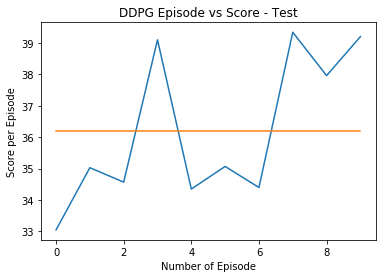

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(scores)), len(scores)*[np.mean(scores)])
plt.ylabel("Score per Episode")
plt.xlabel("Number of Episode")
plt.title("DDPG Episode vs Score - Test")
plt.savefig("ddpg-episode-vs-score-test.png", bbox_inches="tight")
plt.show()